In [31]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
dfNode = pd.read_csv('InputFileNodes.csv')
dfEdge = pd.read_csv('InputFileEdges.csv')


In [33]:
print(dfNode)
print(dfEdge)

     id                media  media.type type.label  audience.size
0   s01             NY Times           1  Newspaper             20
1   s02      Washington Post           1  Newspaper             25
2   s03  Wall Street Journal           1  Newspaper             30
3   s04            USA Today           1  Newspaper             32
4   s05             LA Times           1  Newspaper             20
5   s06        New York Post           1  Newspaper             50
6   s07                  CNN           2         TV             56
7   s08                MSNBC           2         TV             34
8   s09             FOX News           2         TV             60
9   s10                  ABC           2         TV             23
10  s11                  BBC           2         TV             34
11  s12           Yahoo News           3     Online             33
12  s13          Google News           3     Online             23
13  s14          Reuters.com           3     Online           

In [34]:
G = nx.Graph()
nodes = dfNode['id'].unique()
edges = dfEdge.groupby(['from', 'to'])['weight'].sum().reset_index()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges.to_numpy())

print(list(G.nodes(data=True)))
print(list(G.edges(data=True)))


[('s01', {}), ('s02', {}), ('s03', {}), ('s04', {}), ('s05', {}), ('s06', {}), ('s07', {}), ('s08', {}), ('s09', {}), ('s10', {}), ('s11', {}), ('s12', {}), ('s13', {}), ('s14', {}), ('s15', {}), ('s16', {}), ('s17', {})]
[('s01', 's02', {'weight': 23}), ('s01', 's03', {'weight': 21}), ('s01', 's04', {'weight': 21}), ('s01', 's15', {'weight': 22}), ('s01', 's05', {'weight': 1}), ('s02', 's03', {'weight': 21}), ('s02', 's09', {'weight': 1}), ('s02', 's10', {'weight': 5}), ('s02', 's05', {'weight': 21}), ('s03', 's04', {'weight': 23}), ('s03', 's05', {'weight': 1}), ('s03', 's08', {'weight': 2}), ('s03', 's10', {'weight': 2}), ('s03', 's11', {'weight': 1}), ('s03', 's12', {'weight': 1}), ('s03', 's07', {'weight': 1}), ('s04', 's06', {'weight': 1}), ('s04', 's11', {'weight': 22}), ('s04', 's12', {'weight': 3}), ('s04', 's17', {'weight': 4}), ('s04', 's15', {'weight': 1}), ('s05', 's09', {'weight': 2}), ('s05', 's15', {'weight': 21}), ('s06', 's16', {'weight': 23}), ('s06', 's17', {'weight

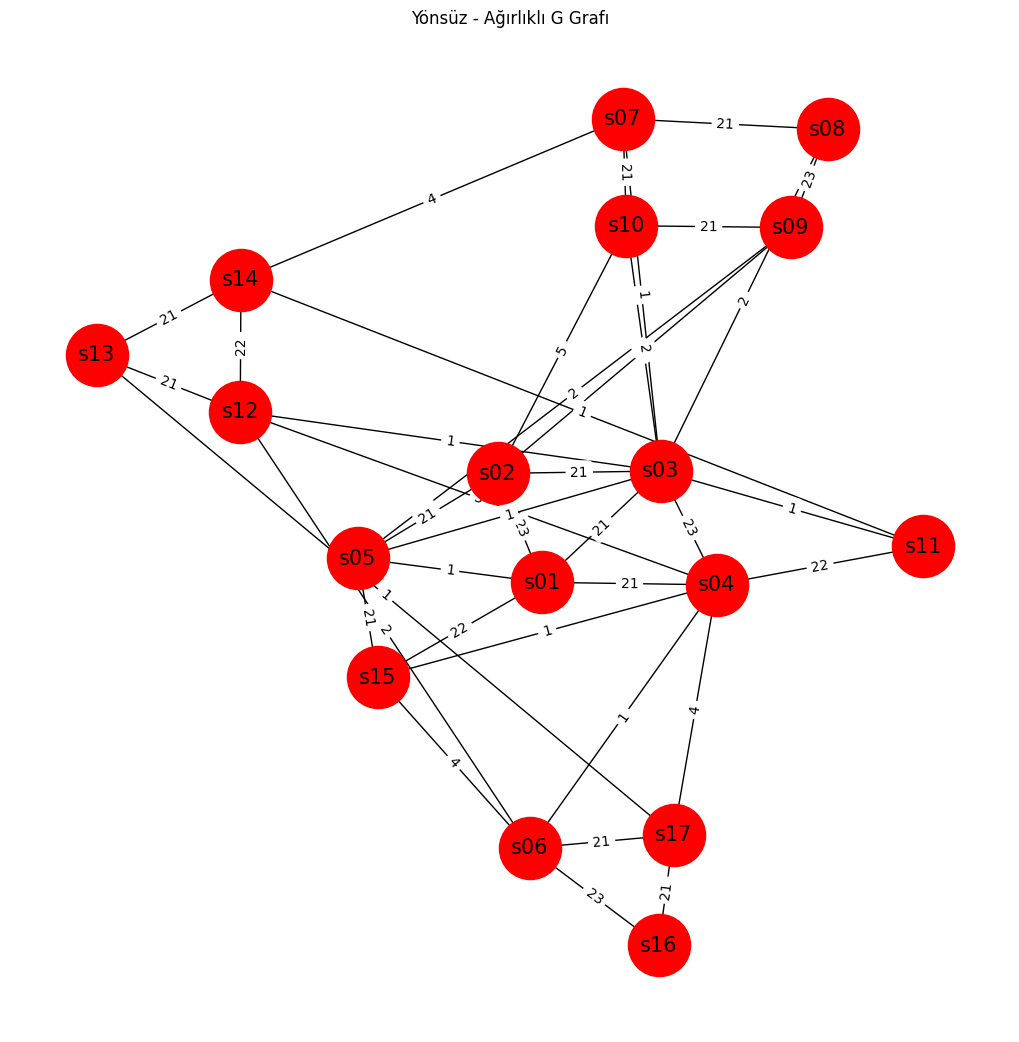

In [35]:
# 4: Yönsüz Graf
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True,
                node_color='red',
                node_size=2000,
                font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Yönsüz - Ağırlıklı G Grafı")
plt.show()


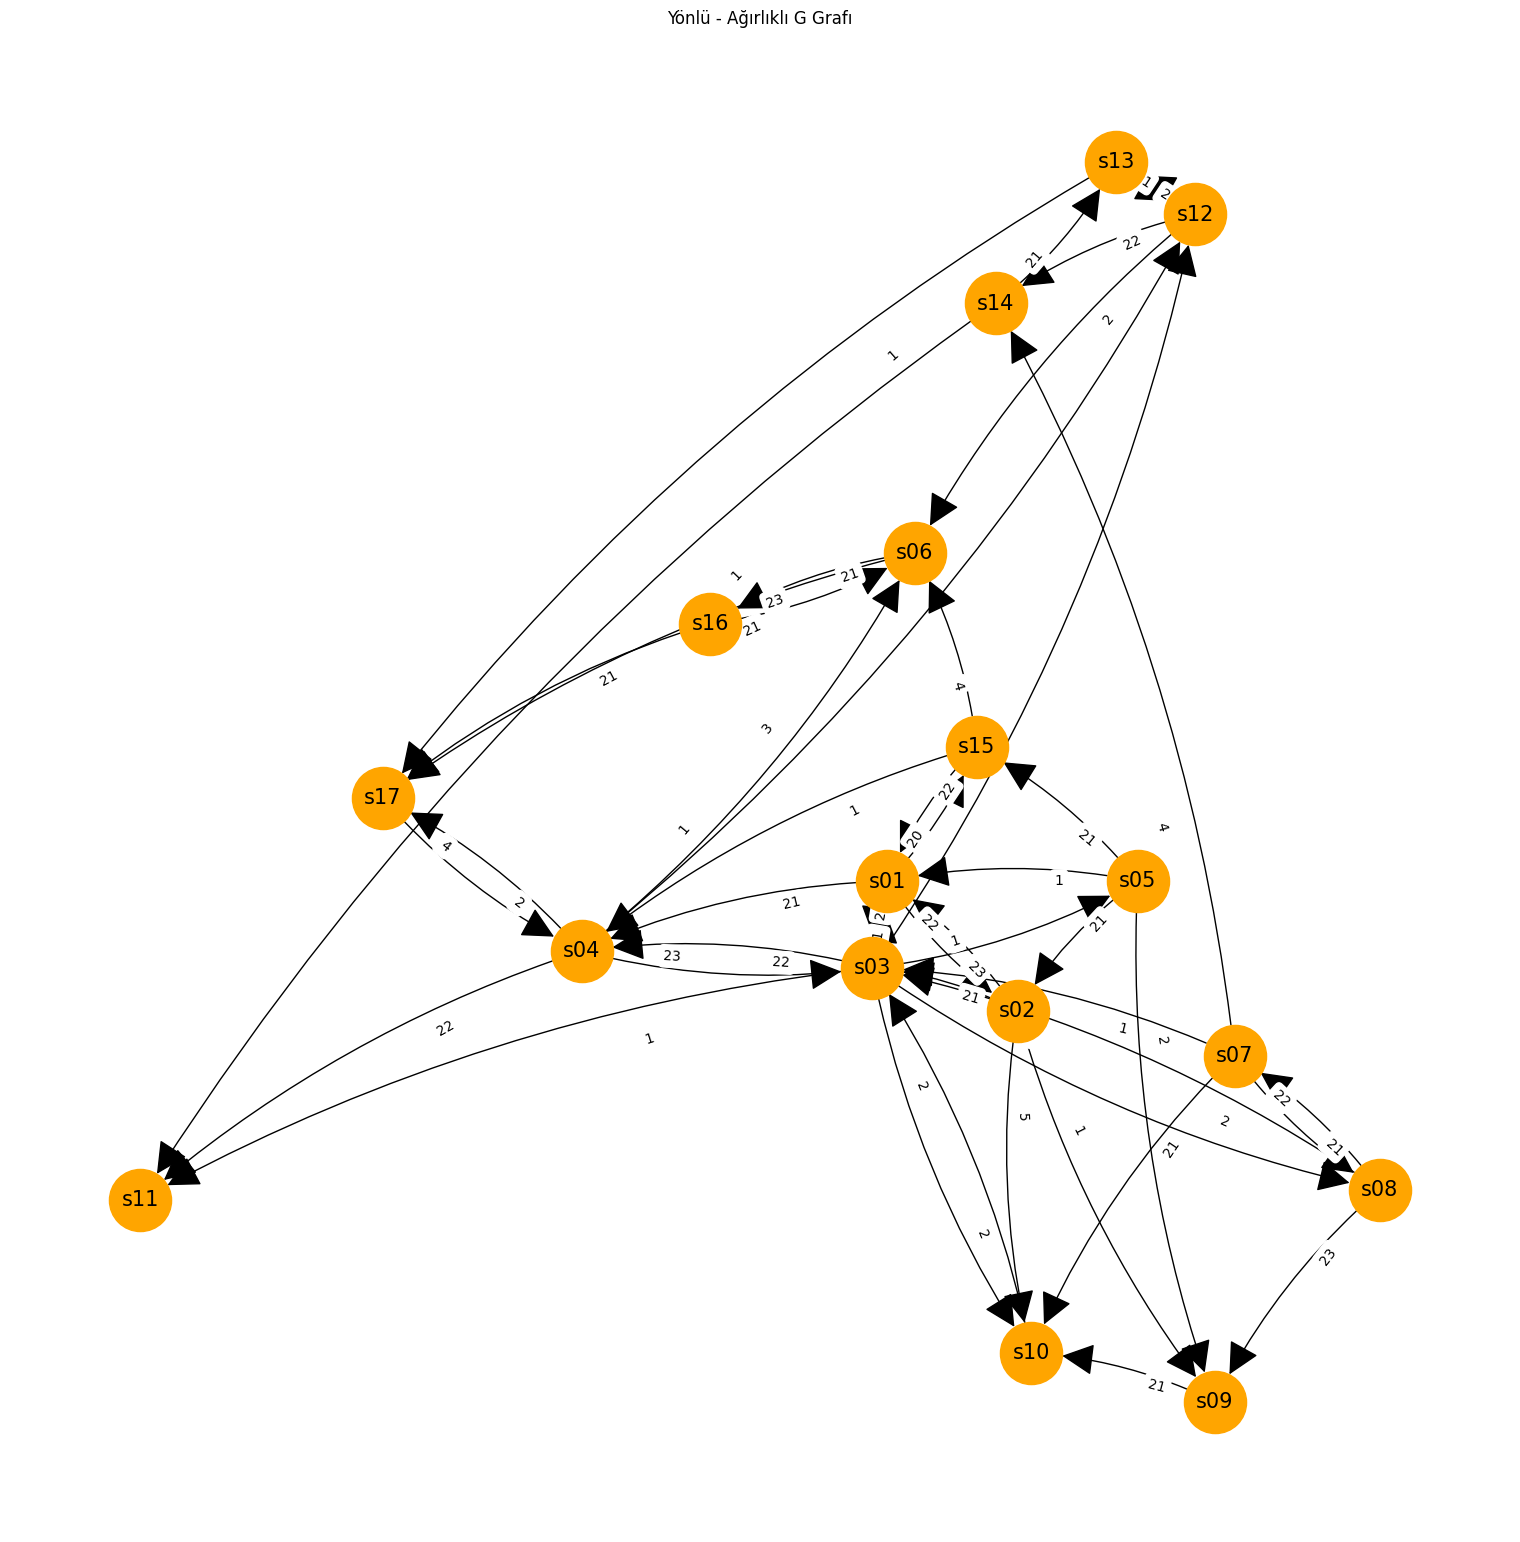

In [36]:
# 5: Yönlü Graf
G_directed = nx.DiGraph()
G_directed.add_nodes_from(nodes)
G_directed.add_weighted_edges_from(edges.to_numpy())
plt.figure(figsize=(15, 15))
pos2 = nx.spring_layout(G_directed, seed=40)
connectionstyle='arc3, rad=0.1'
weights = nx.get_edge_attributes(G_directed, 'weight')
nx.draw(G_directed, pos2, with_labels=True,
                          node_color='orange',
                          node_size=2000,
                          font_size=15,
                          arrows=True,
                          arrowsize=50,
                          connectionstyle='arc3, rad=0.1')
edge_labels = nx.get_edge_attributes(G_directed, 'weight')
nx.draw_networkx_edge_labels(G_directed, pos2, edge_labels=edge_labels, label_pos=0.3)
plt.title("Yönlü - Ağırlıklı G Grafı")
plt.show()

In [37]:
# 6: Düğümlerin derecelerinin listelenmesi

for dugum in G.nodes:
    print(f"{dugum}: {G.degree[dugum]}")

s01: 5
s02: 5
s03: 9
s04: 7
s05: 5
s06: 5
s07: 4
s08: 3
s09: 4
s10: 4
s11: 3
s12: 5
s13: 3
s14: 4
s15: 4
s16: 2
s17: 4


In [38]:
# 7: Ortalama derece hesabı
sum_of_degrees = 0
for node in G.nodes:
    sum_of_degrees += G.degree[node]

print(sum_of_degrees)

print(f"Ortalama Derece: {((sum_of_degrees)/(G.number_of_nodes())):.2f}")

76
Ortalama Derece: 4.47


Histogram Değerleri: [0, 0, 1, 3, 6, 5, 0, 1, 0, 1]


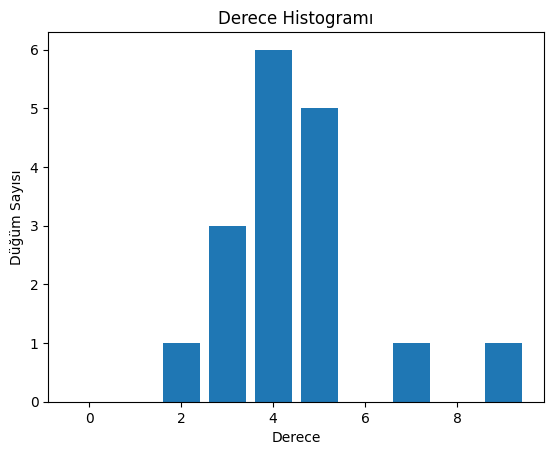

In [39]:
# 8: Histogram Çizimi

histogram = nx.degree_histogram(G)
print(f"Histogram Değerleri: {histogram}")

plt.bar(range(len(histogram)), histogram)
plt.xlabel("Derece")
plt.ylabel("Düğüm Sayısı")
plt.title("Derece Histogramı")
plt.show()


In [40]:
# 9-10-11-12-13-14

print(f"Derece Merkeziliği: {nx.degree_centrality(G)}\n")
print(f"Yakınlık Merkeziliği: {nx.closeness_centrality(G)}\n")
print(f"Arasındalık Merkeziliği: {nx.betweenness_centrality(G)}\n")
print(f"Özvektör Merkeziliği: {nx.eigenvector_centrality(G)}\n")
print(f"Katz Merkeziliği: {nx.katz_centrality(G)}\n")
print(f"PageRank Merkeziliği: {nx.pagerank(G)}")


Derece Merkeziliği: {'s01': 0.3125, 's02': 0.3125, 's03': 0.5625, 's04': 0.4375, 's05': 0.3125, 's06': 0.3125, 's07': 0.25, 's08': 0.1875, 's09': 0.25, 's10': 0.25, 's11': 0.1875, 's12': 0.3125, 's13': 0.1875, 's14': 0.25, 's15': 0.25, 's16': 0.125, 's17': 0.25}

Yakınlık Merkeziliği: {'s01': 0.5333333333333333, 's02': 0.48484848484848486, 's03': 0.6666666666666666, 's04': 0.6153846153846154, 's05': 0.5161290322580645, 's06': 0.5, 's07': 0.48484848484848486, 's08': 0.45714285714285713, 's09': 0.41025641025641024, 's10': 0.47058823529411764, 's11': 0.5161290322580645, 's12': 0.5714285714285714, 's13': 0.43243243243243246, 's14': 0.47058823529411764, 's15': 0.48484848484848486, 's16': 0.35555555555555557, 's17': 0.45714285714285713}

Arasındalık Merkeziliği: {'s01': 0.039146825396825395, 's02': 0.025992063492063486, 's03': 0.3404166666666666, 's04': 0.19566468253968256, 's05': 0.0654563492063492, 's06': 0.10018849206349206, 's07': 0.050277777777777775, 's08': 0.019593253968253968, 's09':

In [41]:
# 15: Modülerlik


In [42]:
# 16: Density/Yoğunluk

print(f"Yoğunluk: {nx.density(G)}")


Yoğunluk: 0.27941176470588236


In [43]:
# 17: Average Clustering

individual_coeffs = nx.clustering(G)
individual_coeffs


{'s01': 0.6,
 's02': 0.6,
 's03': 0.25,
 's04': 0.3333333333333333,
 's05': 0.5,
 's06': 0.4,
 's07': 0.3333333333333333,
 's08': 0.3333333333333333,
 's09': 0.3333333333333333,
 's10': 0.5,
 's11': 0.3333333333333333,
 's12': 0.3,
 's13': 0.3333333333333333,
 's14': 0.16666666666666666,
 's15': 0.5,
 's16': 1.0,
 's17': 0.3333333333333333}

In [44]:
# 18: Diameter/Çap

print(f"Çap: {nx.diameter(G)}")

Çap: 4


Histogram Değerleri: [0, 0, 1, 3, 6, 5, 0, 1, 0, 1]


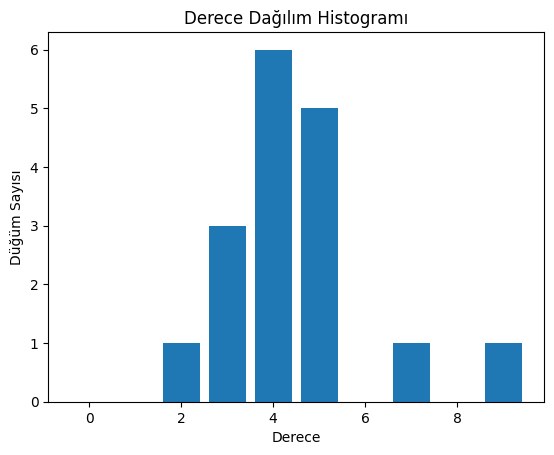

In [45]:
# 19: Derece Dağılımı Hesabı ve Çizimi (Histogram)

histogram = nx.degree_histogram(G)
print(f"Histogram Değerleri: {histogram}")

plt.bar(range(len(histogram)), histogram)
plt.xlabel("Derece")
plt.ylabel("Düğüm Sayısı")
plt.title("Derece Dağılım Histogramı")
plt.show()


In [46]:
# 20: Yorumlar



In [47]:
# 21: En Kritik 5 Köprü Düğümü Sıralaması

bridge_nodes_values = nx.betweenness_centrality(G)
sorted_bridge_nodes_values = sorted(bridge_nodes_values.items(), reverse = True)

print(sorted_bridge_nodes_values[:5])

[('s17', 0.05293650793650794), ('s16', 0.0), ('s15', 0.05621031746031746), ('s14', 0.049166666666666664), ('s13', 0.02111111111111111)]


In [48]:
# 22: En Kritik 5 Lider Düğümü Sıralaması
degree_values = list(G.degree)
sorted_degree_values = sorted(degree_values, key=lambda x: x[1], reverse = True)

sorted_degree_values[:5]

[('s03', 9), ('s04', 7), ('s01', 5), ('s02', 5), ('s05', 5)]

In [49]:
# 23: G_directed için derece dağılımının hesaplanması



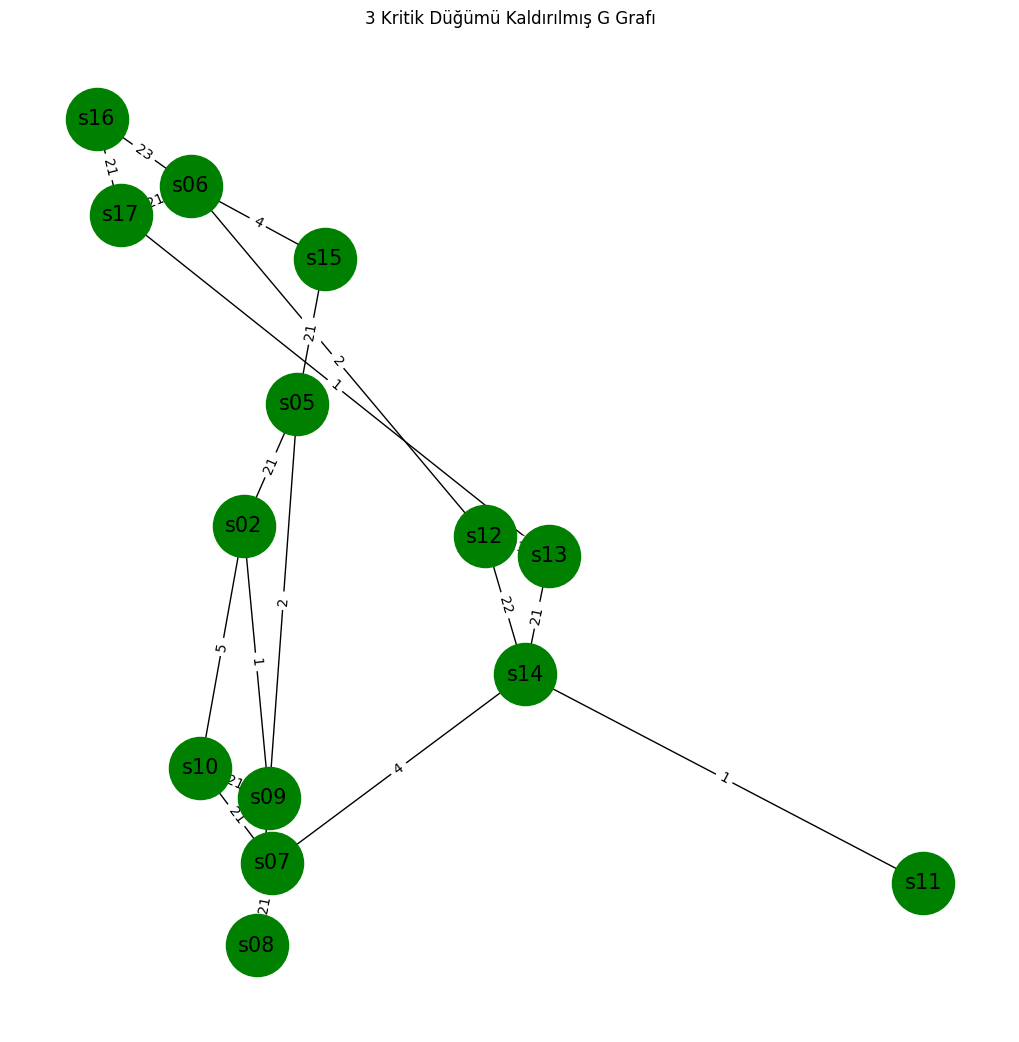

['s02', 's05', 's06', 's07', 's08', 's09', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17']


In [53]:
# 24: G için en güçlü 3 düğümün ağdan kaldırılması sonucu oluşan yeni ağ ve bunun yorumlanması

G.remove_nodes_from([x[0] for x in sorted_degree_values[:3]])
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True,
                node_color='green',
                node_size=2000,
                font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("3 Kritik Düğümü Kaldırılmış G Grafı")
plt.show()
print(G.nodes())
